# Example: Create topoSetDict.local.* files for mesh refinement
* 1: turbine refinement (1.25-m resolution) ==> 75 cells across rotor disk
* 2: turbine refinement (2.5-m resolution)
* 3: turbine refinement (5-m resolution) 

In [1]:
# If the NWTC datatools are not in your path, add it
import os,sys
sys.path.append(os.path.join(os.environ['HOME'],'NWTC'))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datatools.SOWFA.system.topoSet import TopoSetDict, plot

In [3]:
TopoSetDict.source_types

['box', 'cylinder']

In [4]:
ts = TopoSetDict(sources=['cylinder','box','box'])

using defaults
refinement parameters: {'rotation': 0.0, 'upstream': 5.0, 'downstream': 10.0, 'cyl_upstream': 0.5, 'cyl_downstream': 0.5, 'width': 3.0, 'height': 3.0, 'xbuffer_upstream': 1.0, 'xbuffer_downstream': 1.0, 'ybuffer': 1.0, 'zbuffer': 1.0, 'rbuffer': 0.5, 'zoffset': 0.0}


In [5]:
# set default parameters
ts.setup(
    #
    # general parameters
    #
    rotation=30.0,  # [deg]
    ybuffer=0.5,  # lateral spacing between refinement levels, in diameters [-]
    #
    # box refinement parameters
    #
    upstream=5, downstream=10,  # start/end of box in streamwise direction, in diameters [-]
    width=5, height=2.5,  # box dimensions in diameters [-]
    xbuffer_upstream=0.5, xbuffer_downstream=0.5,  # streamwise spacing between refinement levels, in diameters [-]
    zbuffer=0.5,  # vertical spacing between refinement levels, in diameters [-]
    #
    # cylinder refinement parameters
    #
    cyl_upstream=0.5, cyl_downstream=0.5,  # start/end of cylinder in streamwise direction, in diameters [-]
    rbuffer=0.5,  # radial spacing between refinement levels, in diameters [-]
    zoffset=0,  # box lower surface relative to z=0 [-m]
)

refinement parameters: {'rotation': 30.0, 'upstream': 5, 'downstream': 10, 'cyl_upstream': 0.5, 'cyl_downstream': 0.5, 'width': 5, 'height': 2.5, 'xbuffer_upstream': 0.5, 'xbuffer_downstream': 0.5, 'ybuffer': 0.5, 'zbuffer': 0.5, 'rbuffer': 0.5, 'zoffset': 0}


## Background refinement regions, independent of turbines (optional)

In [6]:
#ts.add_background_box(LLcorner=(500,500,0),length=1000,width=1000,height=500)

## Turbine refinement

In [7]:
ts.add_turbine(base_location=[1000,1000,0], D=100.0, zhub=80.0)
ts.add_turbine(base_location=[1200,1200,0], D=100.0, zhub=80.0)

In [8]:
ts

3 refinement levels : ['cylinder', 'box', 'box']
turbine 1 at [1000. 1000.    0.] rotated 30 deg
turbine 2 at [1200. 1200.    0.] rotated 30 deg

## Write out all topoSetDict files
for input to topoSet

In [9]:
ts.write()  # can specify something other than prefix='topoSetDict.local'

0: Writing cylinder dict, level 0 to topoSetDict.local.1
1: Writing box dict, level 0 to topoSetDict.local.2
2: Writing box dict, level 1 to topoSetDict.local.3


## Plot topoSets
for now, need to read in existing topoSetDict files

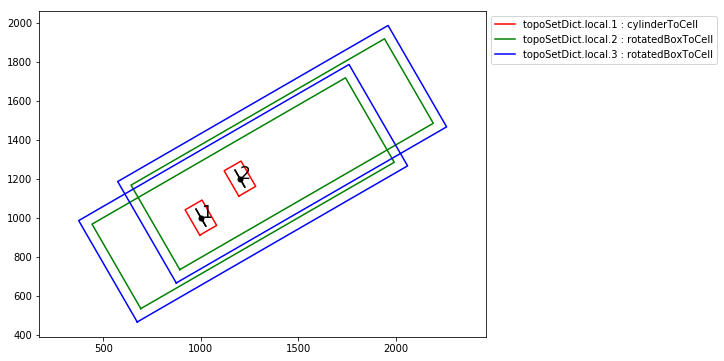

In [10]:
plane = 'xy'  # xy | xz

plt.figure(figsize=(8,6))
plot('topoSetDict.local.1',plane=plane,color='r')
plot('topoSetDict.local.2',plane=plane,color='g')
plot('topoSetDict.local.3',plane=plane,color='b')
ts.plot(plane=plane) # TODO: call topoSet.plot from within TopoSetDict
plt.legend(loc='upper left',bbox_to_anchor=(1,1))

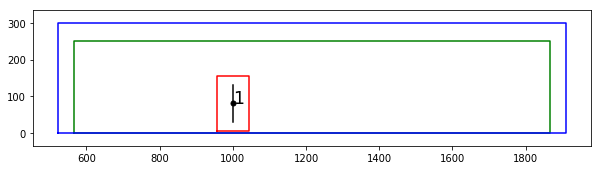

In [11]:
plane = 'xz'
plt.figure(figsize=(10,2.5))

turbines = [1]
ts.plot(plane=plane,turbines=turbines)  # TODO: call topoSet.plot from within TopoSetDict
plot('topoSetDict.local.1',plane=plane,IDs=turbines,color='r')
plot('topoSetDict.local.2',plane=plane,IDs=turbines,color='g')
plot('topoSetDict.local.3',plane=plane,IDs=turbines,color='b')